<a href="https://colab.research.google.com/github/Sahil2004/cs-practicals/blob/main/6th%20sem/%5B01%5D%20Data%20Mining%20and%20Analysis/%5B11%5D%20Practical%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/CO22358_gearpartsales.csv')
X = dataset.iloc[:, [1, 2, 3, 4, 6]].values

In [ ]:
dataset['Sold More than 90%'] = (dataset['Sales Quantity'] / dataset['Quantity Produced'])
dataset['Sold More than 90%'] = dataset['Sold More than 90%'].apply(lambda x: 0 if x > 0.91 else 1 if x > 0.90 else 2)
y = dataset.iloc[:, 8].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer=imputer.fit(X[:,4:])
X[:,4:]=imputer.transform(X[:,4:])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X=LabelEncoder()
for col in range(X.shape[1]):  # Loop through all columns
    X[:, col] = labelencoder_X.fit_transform(X[:, col])  # Ensure 1D conversion

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2,3])],
  remainder='passthrough'
)
X = ct.fit_transform(X)
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

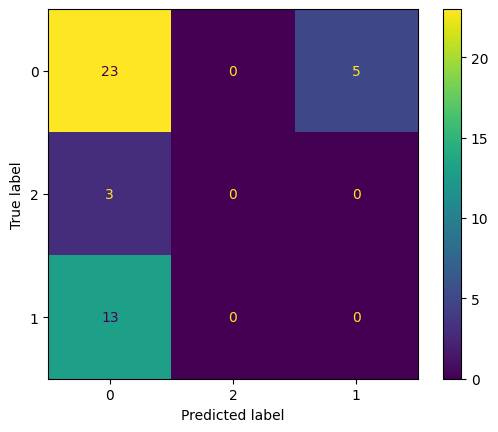

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

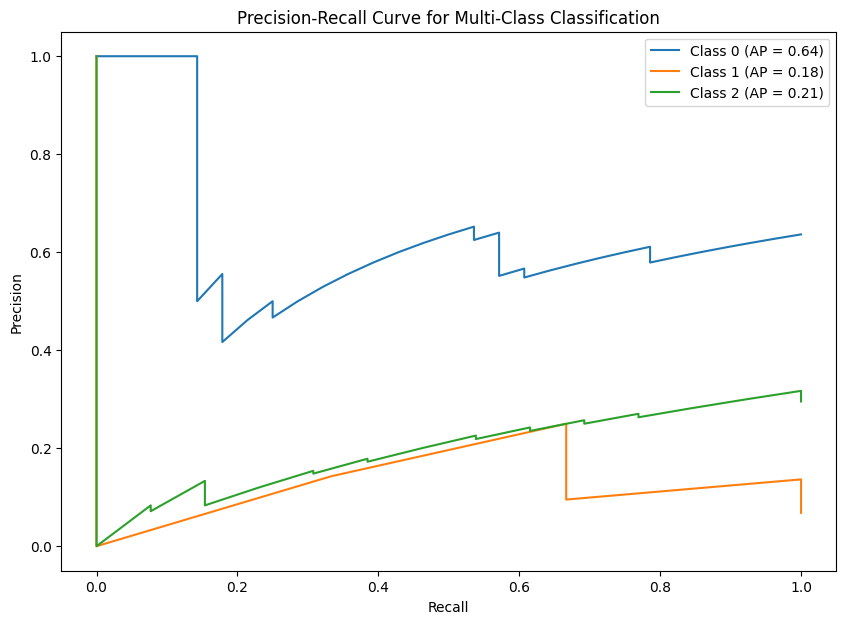

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ",f1score)

Accuracy:  0.5227272727272727
Recall:  1.0
Precision:  0.8846153846153846
F1 Score:  0.9387755102040816


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

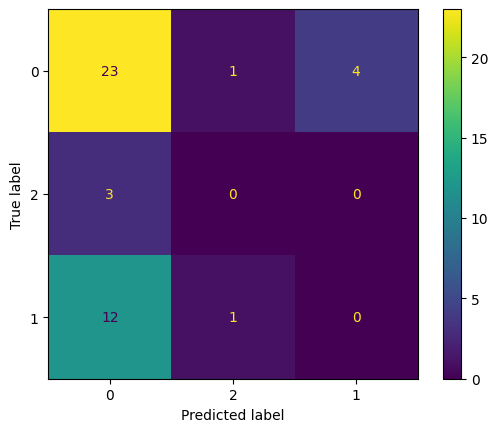

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

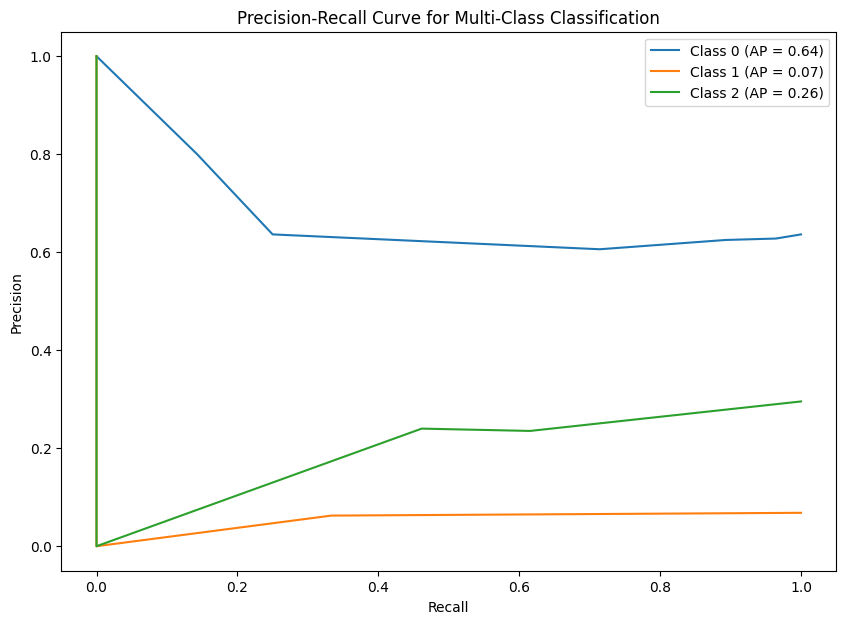

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.9583333333333334
Precision:  0.8846153846153846
F1 Score:  0.9199999999999999


## SVM

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

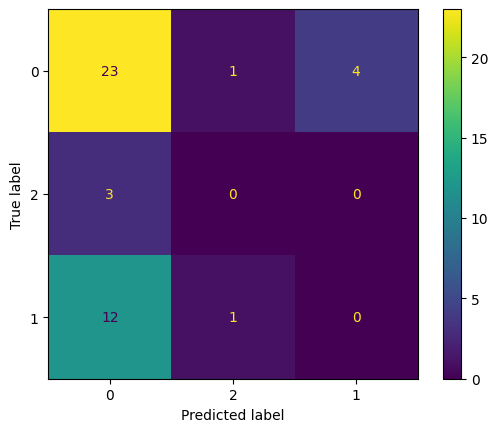

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

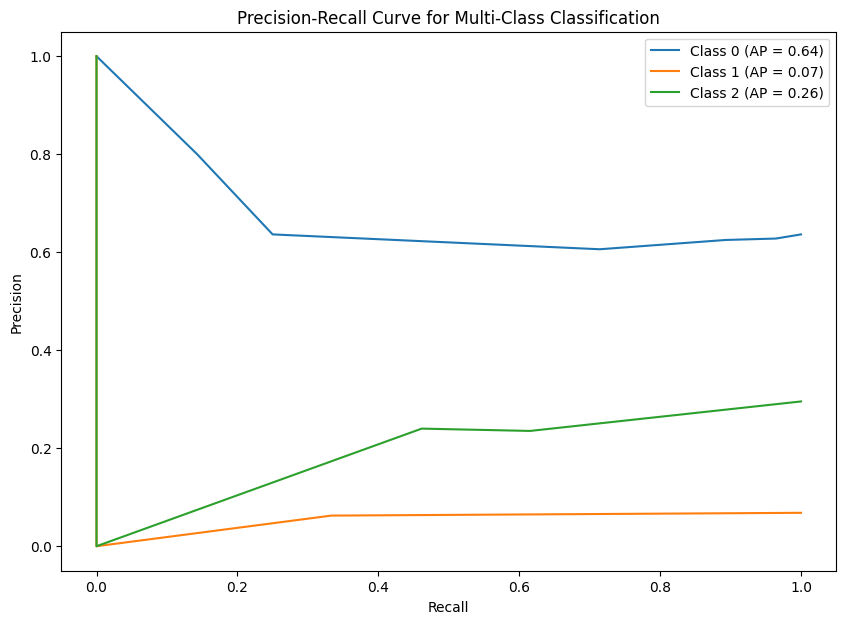

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.9583333333333334
Precision:  0.8846153846153846
F1 Score:  0.9199999999999999


## Kernel SVM

In [ ]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel='rbf', random_state=0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

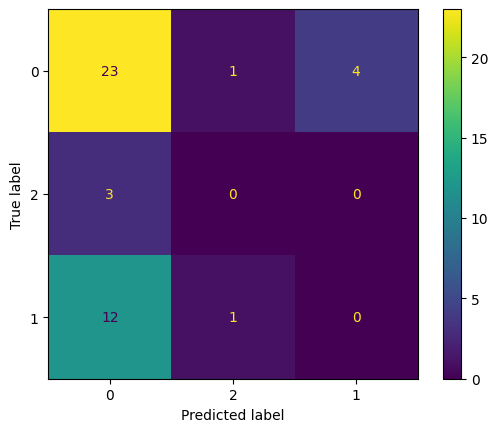

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

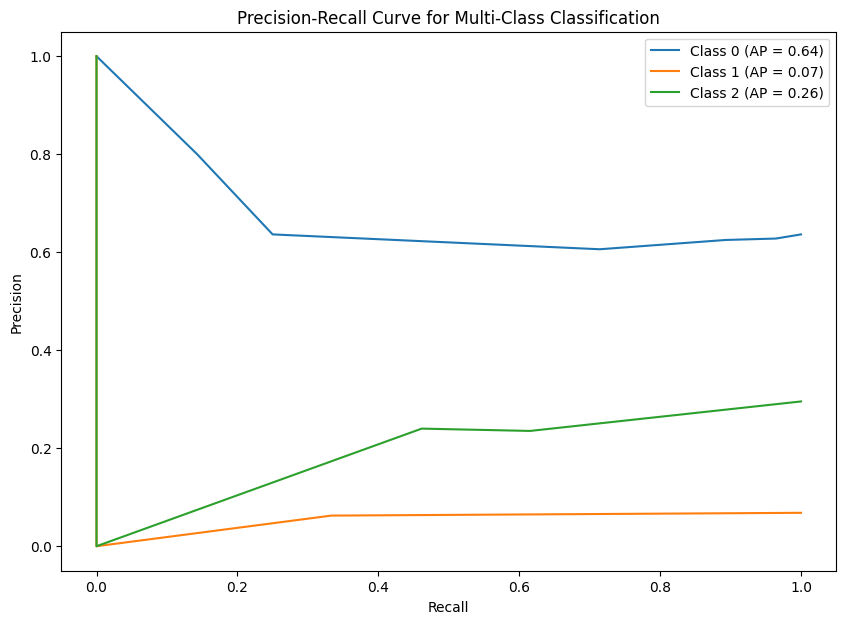

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.9583333333333334
Precision:  0.8846153846153846
F1 Score:  0.9199999999999999


## Naive Bayes

In [ ]:
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_dense, y_train)

GaussianNB()

In [ ]:
y_pred = nb_classifier.predict(X_test_dense)

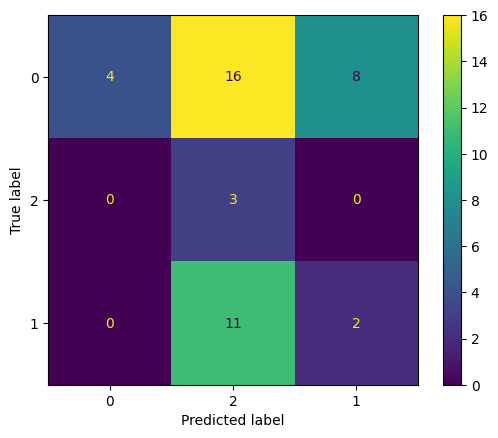

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

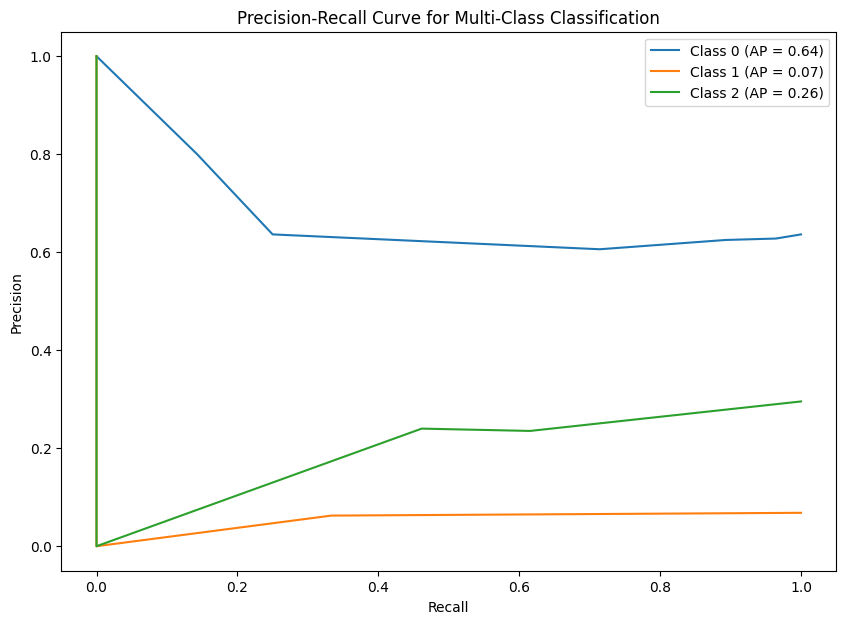

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.1590909090909091
Recall:  0.2
Precision:  1.0
F1 Score:  0.33333333333333337


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

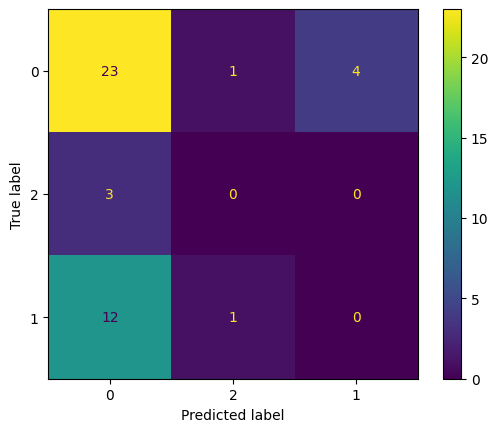

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

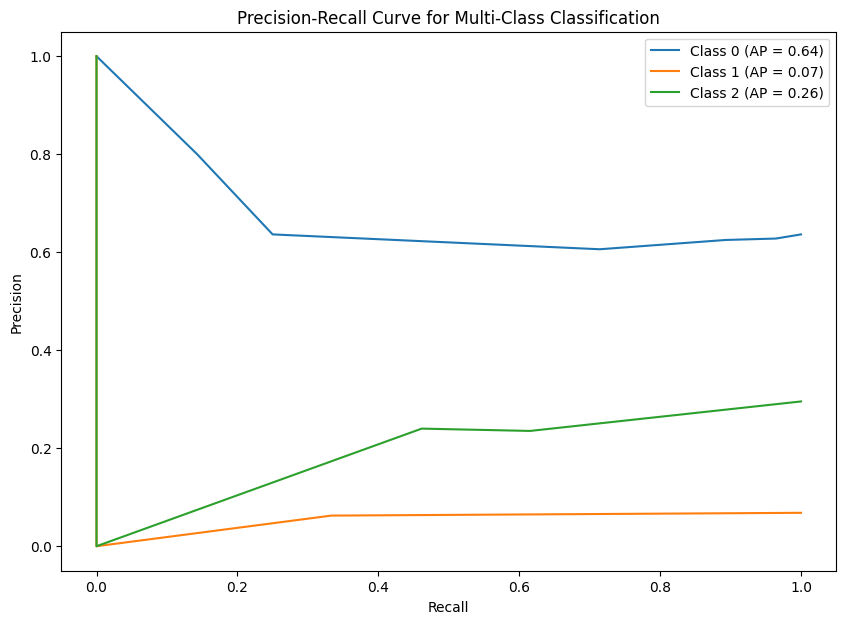

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.9583333333333334
Precision:  0.8846153846153846
F1 Score:  0.9199999999999999


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

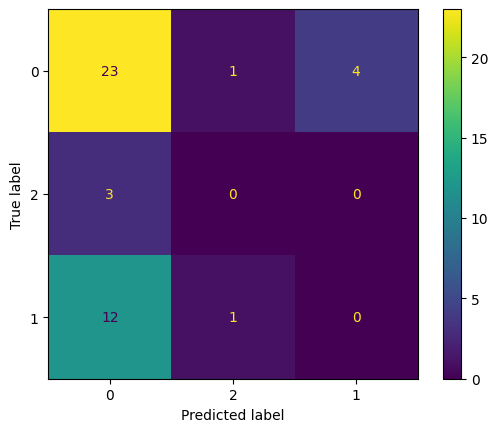

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes = dataset.iloc[:, 8].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

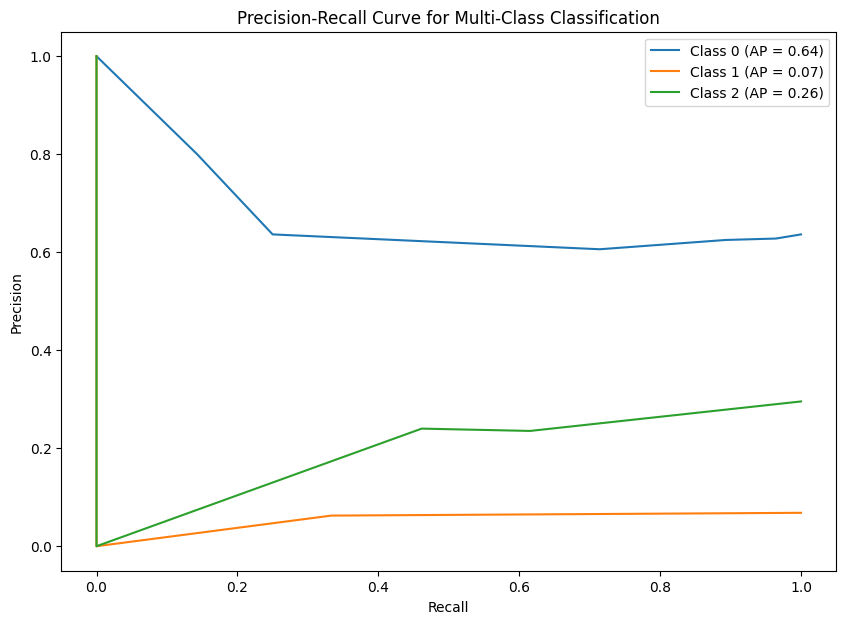

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = classifier.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 7))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.legend()
plt.show()

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print("Accuracy: ", accuracy)
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print("Recall: ", recall)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print("Precision: ", precision)
f1score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1score)

Accuracy:  0.5227272727272727
Recall:  0.9583333333333334
Precision:  0.8846153846153846
F1 Score:  0.9199999999999999
